# Chapter 2: Distributions

### Statistics Notes

A histogram, which plots the frequency of specific values, is a near complete description of a data set. That is, a histogram allows you to recreate the dataset. The only thing missing would be the original order in which the data points were aquired. Naturally, it's a great way to obtain an overview of your data set when conducting exploratory data anlaysis. 

Though we can get a good feeling for the data set from a visual representation like a histogram, it is still necessary to quantify the description. Are there numbers that we can use to answer questions about:

- central tendency: Do the values tend to cluster around a particular point?
- modes: Is there more than one cluster?
- spread: How much variability is there in the values?
- tails: How quickly do the probabilities drop off as we move away from the modes?
- outliers: Are there extreme values far from the modes?

Summary statistics answer some of these questions. They include metrics like mean, mode, and standard deviation. 

- **mean**: One method to describe the central tendency. $$\bar{x} = \frac{1}{n} \Sigma x_i$$ 
This is the formal definition of mean. The average is one of several summary statistics that are used to describe central tendency.

- **variance**: describes variability or spread of the data. $$S^2 = \frac{1}{n}\Sigma\left( x_i - \bar{x} \right)^2$$
The term in paranthesis is the deviation from the mean specific to that data point, and the variance is the mean square of the deviation. The other important term though, is $S$, which is the **standard deviation**. Note that the units of variance are squared and often difficult to interpret. 

- **effect size**: we might compare the means of two or more groups to determine the effect size of some feature. We can also calculate **Cohen's d** $$d = \frac{\bar{x_1} - \bar{x_2}}{s}$$
Here, $s$ is the pooled standard deviation. In short, Cohen's d is the difference in means expressed in terms of thE standard deviation. 

## Tutorial

In [52]:
# Let's set up the environment with required packages

from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nsfg
import first
import seaborn as sns

In [4]:
# Here's a list of data points. There are several ways to describe the frequencies

t = [1, 2, 2, 3, 5]

In [5]:
# One is to use a Python dictionary

hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [6]:
# Another is to use a counter

from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

In [8]:
# Here, we can use the Hist objects provided in the thinkstats2 module

import thinkstats2
hist = thinkstats2.Hist(t)
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [9]:
# Hist objects have the Freq() method to find the frequency of a value

hist.Freq(2)

2

In [10]:
# Because a Hist objects is a Python dictionary, we can also use brackets to access values

hist[2]

2

In [11]:
# A non-existing value will return a frequency of 0

hist[4]

0

In [12]:
# The Values() method returns only the values contained in the Hist object, in case you forgot

hist.Values()

dict_keys([1, 2, 3, 5])

In [13]:
# We can iterate through the Hist object values and frequencies

for value in sorted(hist.Values()):
    print(value, hist[value])

1 1
2 2
3 1
5 1


In [14]:
# Or we can use the Items() method

for value, frequency in hist.Items():
    print(value, frequency)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`. For example `Hist` plots the values and their frequencies as a bar graph.`Config` takes parameters that label the x and y axes, among other things.

This is a non-common Python library so it's best not to develop a dependence on it.

No handles with labels found to put in legend.


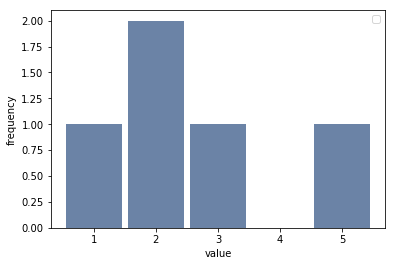

In [16]:
# Making histograms using the thinkplot module

import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

In [17]:
# Let's load the data and filter it for live births

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


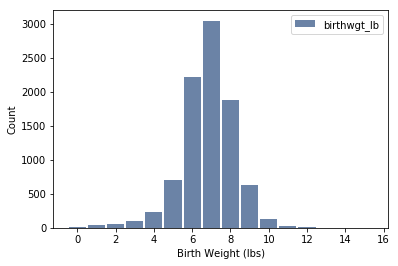

In [18]:
# Let's plot the frequency of birth weights in pounds

hist = thinkstats2.Hist(live.birthwgt_lb, label = 'birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Birth Weight (lbs)', ylabel = 'Count')

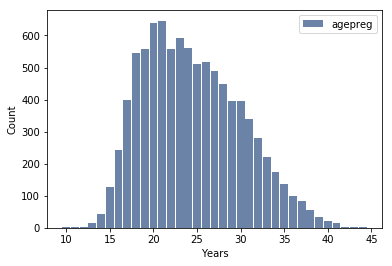

In [20]:
# Let's round the ages down before plotting

ages = np.floor(live.agepreg)

hist = thinkstats2.Hist(ages, label = 'agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Years', ylabel = 'Count')

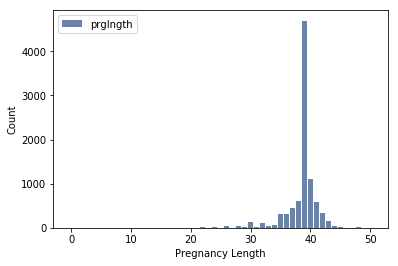

In [21]:
# Let's plot the frequency of pregnancy lengths (prglngth)

hist = thinkstats2.Hist(live.prglngth, label = 'prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Pregnancy Length', ylabel = 'Count')

In [25]:
# Hist provides the method Smallest() to return the lowest n values and corresponding
# frequencies in a Hist object 

for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [26]:
# Hist provides the method Largest() to return the largest n values and corresponding
# frequencies in a Hist object 

for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


In [28]:
# From among live births we can select first babies and compare their pregnancy length to that of the
# rest of the live birth pregnancies

firsts = live[live.birthord ==1]
not_firsts = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label = 'Firsts')
not_first_hist = thinkstats2.Hist(not_firsts.prglngth, label = 'Not First')

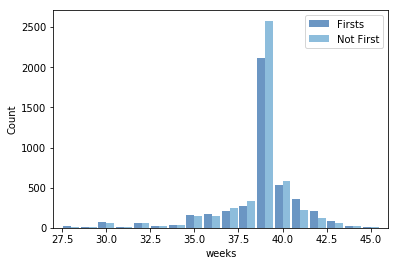

In [29]:
# Aligning the two histograms side by side 

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(not_first_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [33]:
# Series objects have methods to calculate some summary statistics

mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [34]:
# Here they are

mean, std, var

(38.56055968517709, 2.702343810070593, 7.302662067826851)

In [35]:
# Let's verify that the standard deviation, std, is the square root of the variance, var

std == np.sqrt(var)

True

In [37]:
# Let's find the mean of the pregnancy lengths for first and not-first babies

firsts.prglngth.mean(), not_firsts.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [38]:
# Here's the difference between the two in weeks

firsts.prglngth.mean() - not_firsts.prglngth.mean()

0.07803726677754952

In [39]:
# This functon computes the Cohen effect size, which is the difference in means expressed 
# in terms of standard deviations

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [41]:
# Let's compute the Cohen effect size for the difference in pregnancy length for first and non-firsts

CohenEffectSize(firsts.prglngth, not_firsts.prglngth)

0.028879044654449883

## Exercises

In [42]:
# Investigate whether first babies are lighter or heavier than non-first babies

firsts.totalwgt_lb.mean(), not_firsts.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [44]:
# Compare the two quantities

CohenEffectSize(firsts.totalwgt_lb, not_firsts.totalwgt_lb)

0.088672927072602

In [50]:
# Load the respondent file

resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


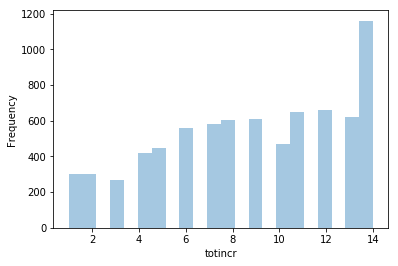

In [56]:
# Create a histogram of the total income of respondents' family. Refer to the codebook in necessary

ax = sns.distplot(resp.totincr, kde = False)
ax.set(xlabel='totincr', ylabel='Frequency')
plt.show()

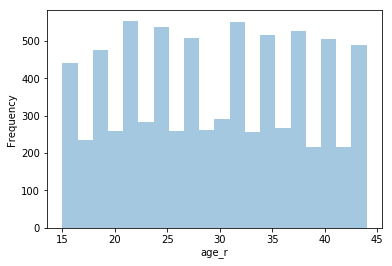

In [55]:
# Create a histogram of the respondents' ages at time of interview

ax1 = sns.distplot(resp.age_r, kde = False)
ax1.set(xlabel = 'age_r', ylabel = 'Frequency')
plt.show()

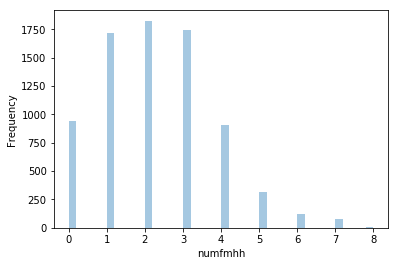

In [58]:
# Create a histogram of the number of people in respondents' households

ax2 = sns.distplot(resp.numfmhh, kde = False)
ax2.set(xlabel = 'numfmhh', ylabel = 'Frequency')
plt.show()

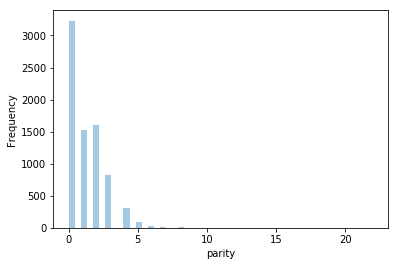

In [60]:
# Create a histogram of the number of children borne by the respondents

ax4 = sns.distplot(resp.parity, kde = False)
ax4.set(xlabel = 'parity', ylabel = 'Frequency')
plt.show()

In [64]:
# Find the largest values of parity

resp.parity.value_counts().sort_index(ascending = False)

22       1
16       1
10       3
9        2
8        8
7       15
6       29
5       95
4      309
3      828
2     1603
1     1519
0     3230
Name: parity, dtype: int64

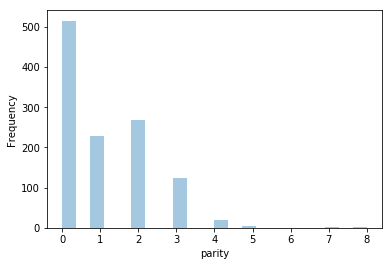

In [67]:
# Investigate wheter people with higher income have higher parity. Keep in mind the context of the
# data, in particular that respondents are at different points in their lives.

rich = resp[resp.totincr == 14]

ax5 = sns.distplot(rich.parity, kde = False)
ax5.set(xlabel = 'parity', ylabel = 'Frequency')
plt.show()

In [68]:
# Find the largest values of parities for high income respondents

rich.parity.value_counts()

0    515
2    267
1    229
3    123
4     19
5      5
8      1
7      1
Name: parity, dtype: int64

In [69]:
# Compare the parity of high income respondents to that of others

not_rich = resp[resp.totincr < 14]

In [72]:
rich.parity.mean(), not_rich.parity.mean(), CohenEffectSize(rich.parity,not_rich.parity)

(1.0758620689655172, 1.2495758136665125, -0.1251185531466061)